# K-medias

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MLUtilities as utils

In [2]:
df_bmw = pd.read_csv('bmw.csv')
df_bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Conteo del número de NANs

In [3]:
df_bmw.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Visualización de variables numéricas

In [4]:
df_num_bmw = df_bmw.select_dtypes('number')
df_num_bmw.head(10)

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0
5,2016,14900,35309,125,60.1,2.0
6,2017,16000,38538,125,60.1,2.0
7,2018,16250,10401,145,52.3,1.5
8,2017,14250,42668,30,62.8,2.0
9,2016,14250,36099,20,68.9,2.0


El heatmap nos muestra que las variables no categóricas con más peso son el precio, el millaje y las mpg, por lo que es conveniente filtrar nuestro dataset para estas variables en específico.

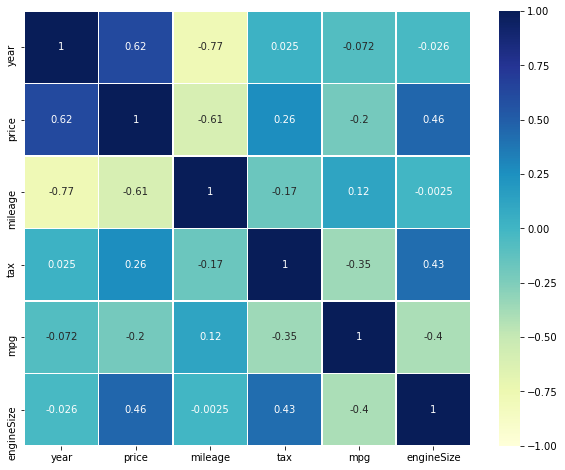

In [5]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_num_bmw.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

La variable mpg contiene algunos de los outliers más notorios

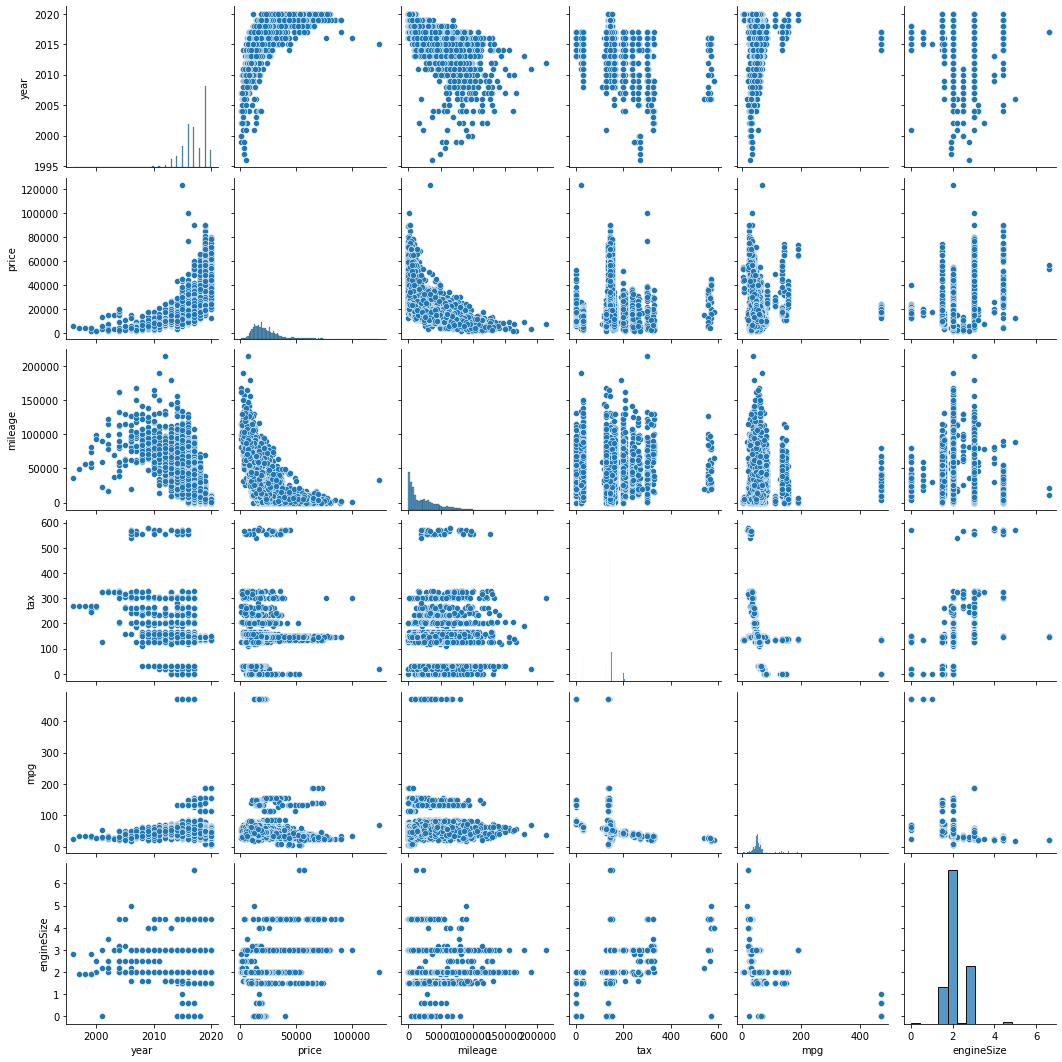

In [6]:
sns.pairplot(df_num_bmw);

Se define una función para filtrar los valores atípicos empleando el rango intercuartil

In [3]:
def removeOutliers(col):
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    list_col = list(col[col.between(lower_range, upper_range)])
    filter_col = col.isin(list_col)
    return filter_col

In [5]:
df_bmw_filter = df_bmw[df_num_bmw[['price','mileage','mpg']].apply(lambda x: removeOutliers(x)).all(axis=1)]
df_bmw_filter = df_bmw_filter.reset_index(drop=True)
df_bmw_filter.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [24]:
engine = df_bmw_filter['engineSize']
segmentos = pd.cut(engine, 5)

df_bmw_filter['engineSize'].groupby(segmentos).count()

engineSize
(-0.0044, 0.88]      12
(0.88, 1.76]       1497
(1.76, 2.64]       6205
(2.64, 3.52]       1990
(3.52, 4.4]          51
Name: engineSize, dtype: int64

In [69]:
bins= list(np.linspace(engine.min()-0.5,engine.max()+0.5,6))
labels=['Very low','Low','Medium','High','Very high']
df_bmw_filter['categorySize']=pd.cut(df_bmw_filter['engineSize'], bins=bins, labels=labels, right=True)
df_bmw_filter

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,categorySize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Medium
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Medium
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,High
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Low
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,High
...,...,...,...,...,...,...,...,...,...,...
9750,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,Medium
9751,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,Medium
9752,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,Medium
9753,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,Medium


In [70]:
df_bmw_filter.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
categorySize    0
dtype: int64

In [71]:
set(segmentos)
df_bmw_filter[df_bmw_filter['engineSize']<=1.1]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,categorySize
6819,1 Series,2017,12800,Manual,18067,Petrol,20,68.9,0.0,Very low
6840,3 Series,2018,18000,Automatic,21057,Diesel,150,64.2,0.0,Very low
7861,1 Series,2017,13500,Manual,16681,Diesel,150,68.9,0.0,Very low
7956,1 Series,2001,13000,Manual,22633,Petrol,125,53.3,0.0,Very low
7958,1 Series,2017,12800,Manual,30521,Diesel,145,68.9,0.0,Very low
7960,3 Series,2018,18000,Automatic,23611,Diesel,150,64.2,0.0,Very low
7967,3 Series,2018,18000,Automatic,24716,Diesel,150,64.2,0.0,Very low
7969,1 Series,2016,12400,Manual,24528,Diesel,20,68.9,0.0,Very low
7994,2 Series,2016,15000,Automatic,17097,Diesel,20,68.9,0.0,Very low
8164,2 Series,2015,14700,Automatic,32882,Diesel,125,60.1,0.0,Very low


In [9]:
print('Cantidad original de filas:', df_bmw.shape[0])
print('Cantidad de filas luego de aplicar el filtro:',df_bmw_filter.shape[0])

Cantidad original de filas: 10781
Cantidad de filas luego de aplicar el filtro: 9755


Heatmap y pairplots del dataframe filtrado

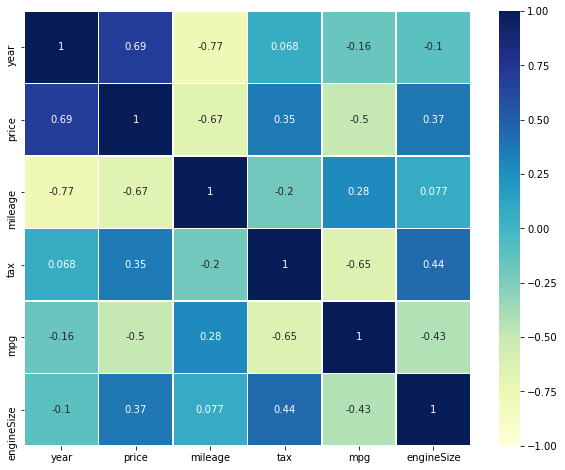

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_bmw_filter.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

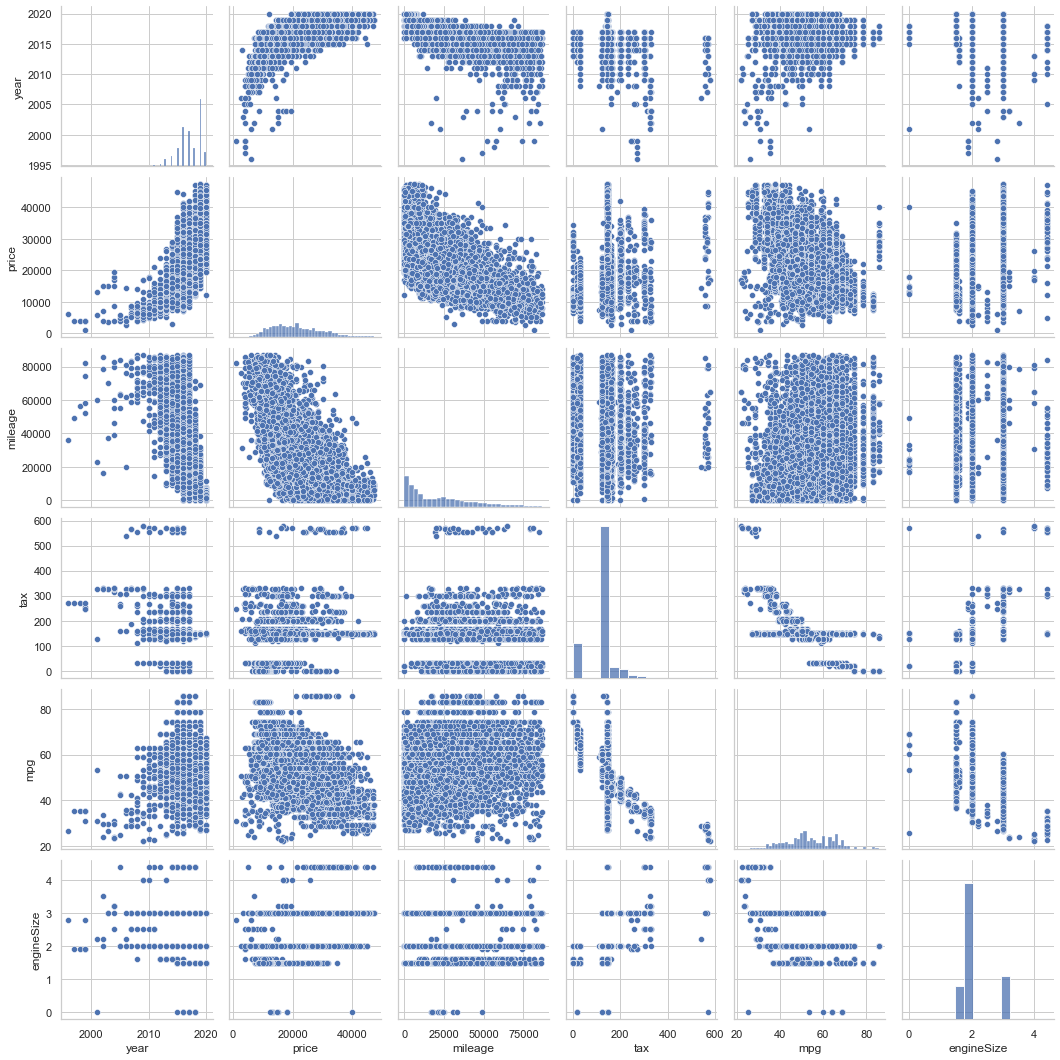

In [11]:
sns.set(style="whitegrid")
sns.pairplot(df_bmw_filter.select_dtypes('number'));

Definimos una función para visualizar los boxplots y la variación de los estimados de locación

In [12]:
def graphic_filter(original_col, filtered_col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    media_sin_filtro = original_col.mean()
    sns.boxplot(ax=axes[0], x=original_col).set_title('No filter')
    axes[0].axvline( media_sin_filtro, c='r',ls=':')

    media_con_filtro = filtered_col.mean()
    sns.boxplot(ax=axes[1], x=filtered_col).set_title('Filtered')
    axes[1].axvline(media_con_filtro, c='r',ls=':')
    
    antes = [media_sin_filtro, original_col.median(), utils.obtenerModa(original_col), original_col.std()]
    antes = np.around(list(antes),2)
    despues = [media_con_filtro, filtered_col.median(), utils.obtenerModa(filtered_col), filtered_col.std()]
    despues = np.around(list(despues),2)
    
    datos = {
    'Antes': antes,
    'Después':  despues,
    'Diferencia (%)': np.around(100*(antes-despues)/antes,2)
    }
    
    df_per = pd.DataFrame(datos)
    df_per.index = ['Media','Mediana', 'Moda', 'Desviación']
    return df_per

In [13]:
sns.set(style="whitegrid", context="talk")

,Antes,Después,Diferencia (%)
Media,22733.41,21446.38,5.66
Mediana,20462.00,20000.00,2.26
Moda,20980.00,20980.00,0.00
Desviación,11415.53,8387.97,26.52


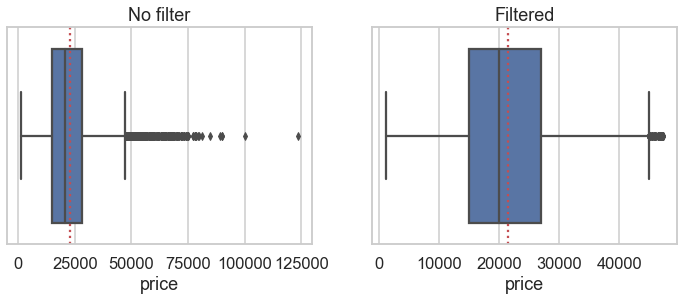

In [14]:
graphic_filter(df_bmw['price'],df_bmw_filter['price'])

,Antes,Después,Diferencia (%)
Media,56.40,53.81,4.59
Mediana,53.30,53.30,0.00
Moda,65.70,65.70,0.00
Desviación,31.34,10.88,65.28


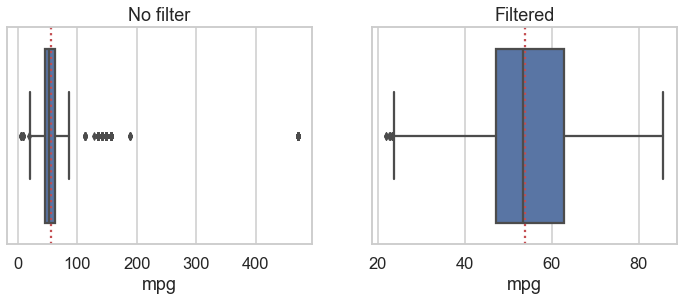

In [15]:
graphic_filter(df_bmw['mpg'],df_bmw_filter['mpg'])

,Antes,Después,Diferencia (%)
Media,25496.99,24100.74,5.48
Mediana,18347.00,18847.00,-2.73
Moda,123.00,123.00,0.00
Desviación,25143.19,21609.72,14.05


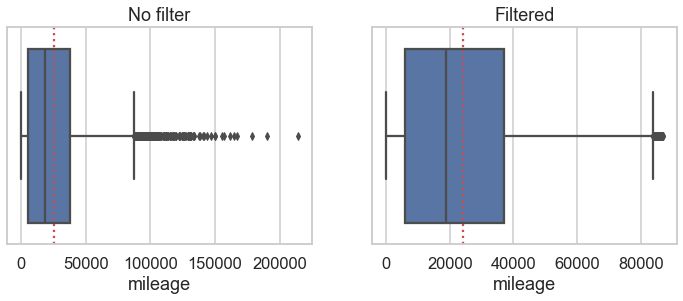

In [16]:
graphic_filter(df_bmw['mileage'],df_bmw_filter['mileage'])

Segmentemos nuestro pairplot con variables categóricas

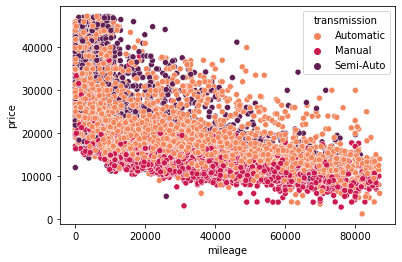

In [519]:
# Variable transmission
df_transmission= df_bmw_filter['transmission']
sns.scatterplot(x=df_bmw_filter['mileage'],y=df_bmw_filter['price'], hue=df_transmission, palette="rocket_r");

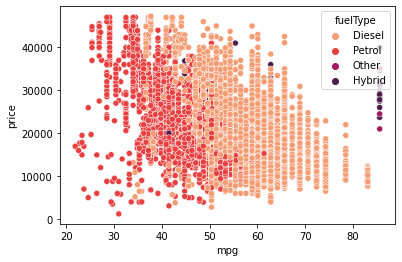

In [90]:
# Variable combustible
df_fuel= df_bmw_filter['fuelType']
sns.scatterplot(x=df_bmw_filter['mpg'],y=df_bmw_filter['price'], hue=df_fuel, palette="rocket_r");

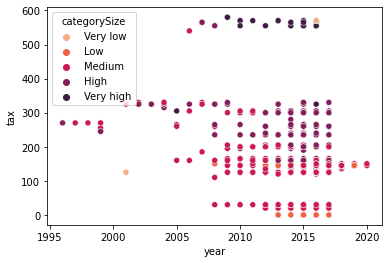

In [91]:
# Variable 
df_size= df_bmw_filter['categorySize']
sns.scatterplot(x=df_bmw_filter['year'],y=df_bmw_filter['tax'], hue=df_size, palette="rocket_r");
#sns.scatterplot(x=df_bmw_filter['mileage'],y=df_bmw_filter['tax'], hue=df_transmission, palette="rocket_r");

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Transformando en datasets de entrenamiento y prueba.

In [451]:
df_bmw_short = df_bmw_filter.copy()
# Seleccionamos los tipos de combustible más comunes
df_bmw_short=df_bmw_short[(df_bmw_short['fuelType']== 'Diesel') | (df_bmw_short['fuelType']== 'Petrol')]
X = df_bmw_short[['mpg', 'price']].to_numpy()
y = df_bmw_short['fuelType'].map({
    'Petrol':0,
    'Diesel':1
}).to_numpy()

In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

df_bmw_short = df_bmw_filter.copy()
# Seleccionamos los tipos de combustible más comunes
df_bmw_short=df_bmw_short[(df_bmw_short['fuelType']== 'Diesel') | (df_bmw_short['fuelType']== 'Petrol')]
X = df_bmw_short[['mpg', 'price']]
y = df_bmw_short['fuelType'].map({
    'Petrol':0,
    'Diesel':1
})

#Creamos un DataFrame mapeado
y= {'fuelType': y}
y = pd.DataFrame(y)
data = pd.concat([X,y], axis=1)
data


#Intento de normalización de los datos
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

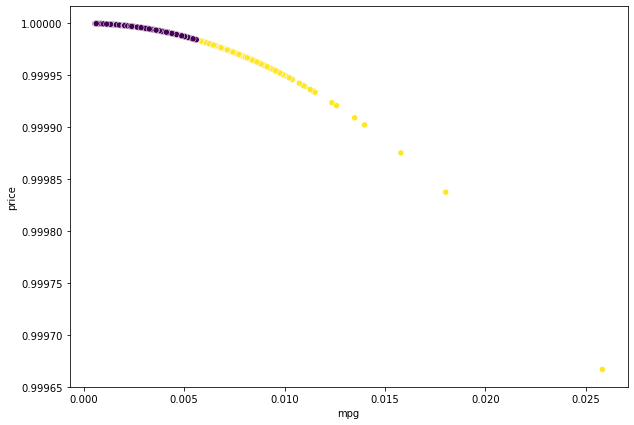

In [97]:
# Gráfica del clustering acumulativo
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_cluster = cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
sns.scatterplot(x=data_scaled['mpg'], y=data_scaled['price'], c=cluster.labels_, );

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import preprocessing

# Escalando los datos y usando pipeline
df_bmw_short = df_bmw_filter.copy()
# Seleccionamos los tipos de combustible más comunes
df_bmw_short=df_bmw_short[(df_bmw_short['fuelType']== 'Diesel') | (df_bmw_short['fuelType']== 'Petrol')]
y = df_bmw_short['fuelType'].map({
    'Petrol':0,
    'Diesel':1
}).to_numpy()

# El método preprocesing nos permite escalar los datos
bmw_values = df_bmw_short[['mpg', 'price']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(bmw_values)
x_scaled = pd.DataFrame(x_scaled,
columns= ['mpg', 'price']).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.4)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data

y_pipe = pipe.predict(x_test)
df_predicciones = pd.DataFrame({'valor real':y_test, 'prediccion':y_pipe})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor real,prediccion
0,0,0
1,1,1
2,1,1
3,0,0
4,0,1
5,1,0
6,1,1
7,0,0
8,1,1
9,1,1


Score: 0.8543063434760185
[[ 972  309]
 [ 256 2341]]


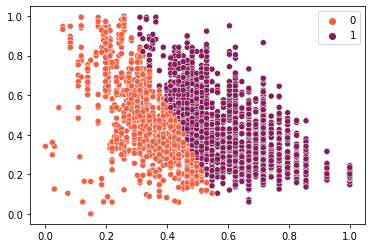

In [100]:
# Gráfico de escala con regresión logarítmica
sns.scatterplot(x= x_test[:,0],y= x_test[:,1], hue=y_pipe, palette="rocket_r");
cnf_matrix = metrics.confusion_matrix(y_test, y_pipe)
print('Score:',pipe.score(x_test, y_test)) 
print(cnf_matrix)

In [603]:
df_bmw_short['cluster'] = pipe.predict(X)
df_bmw_short = df_bmw_short.reset_index(drop=True)
df_bmw_short

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,cluster
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,0
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,0
...,...,...,...,...,...,...,...,...,...,...
9688,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,0
9689,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,0
9690,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,0
9691,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,0


In [651]:
#K-Means
# Escalando los datos en lugar de normalizar
df_bmw_short = df_bmw_filter.copy()

y = df_bmw_short['transmission'].map({
    'Automatic':0,
    'Manual':1,
    'Semi-Auto':2
}).to_numpy()

from sklearn import preprocessing
# El método preprocesing nos permite escalar los datos
bmw_values = df_bmw_short[['mileage', 'price']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(bmw_values)
x_scaled = pd.DataFrame(x_scaled,
columns= ['mileage', 'price']).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3)

# Usando K-Means
modelo_kmeans = KMeans(n_clusters = 3, random_state = 1).fit(x_train)
y_kmeans = modelo_kmeans.predict(x_test)
df_predicciones = pd.DataFrame({'valor real':y_test, 'prediccion':y_kmeans})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor real,prediccion
0,0,2
1,2,2
2,2,2
3,1,2
4,0,0
5,1,2
6,2,2
7,1,0
8,0,0
9,2,0


In [106]:
#K-Means
# Escalando los datos en lugar de normalizar
df_bmw_short = df_bmw_filter.copy()
#df_bmw_short=df_bmw_short[(df_bmw_short['categorySize'] != 'Very low') | (df_bmw_short['categorySize'] != 'Low')]
df_bmw_short=df_bmw_short[(df_bmw_short['categorySize'] != 'Very low')]

X = df_bmw_short[['year','tax']].to_numpy()

my_dict = {'Low': 0, 'Medium': 1, 'High':2, 'Very high':3}
y = df_bmw_short['categorySize'].map(my_dict).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Usando K-Means
modelo_kmeans = KMeans(n_clusters = 4, random_state = 1).fit(x_train)
y_kmeans = modelo_kmeans.predict(x_test)
df_predicciones = pd.DataFrame({'valor real':y_test, 'prediccion':y_kmeans})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

set(y)

{0.0, 1.0, 2.0, 3.0}

In [81]:
df_bmw_short['cluster'] = modelo_kmeans.predict(X)
df_bmw_short = df_bmw_short.reset_index(drop=True)
df_bmw_short

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,categorySize,cluster
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Medium,0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Medium,0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,High,0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Low,0
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,High,0
...,...,...,...,...,...,...,...,...,...,...,...
9738,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,Medium,0
9739,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,Medium,0
9740,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,Medium,2
9741,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,Medium,1


#### Centroides.
Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [107]:
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[2017.71668897  144.80405276]
 [2015.46011132   23.24675325]
 [2013.09677419  561.4516129 ]
 [2014.58541667  229.42708333]]


In [108]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_kmeans)
cnf_matrix

array([[ 345,  118,    0,    0],
       [1465,  385,    0,   32],
       [ 391,    0,    0,  176],
       [   5,    0,    4,    2]], dtype=int64)

In [84]:
utils.obtenerAccuracy_kmedias(x_test,centroides)

75.84673280875812

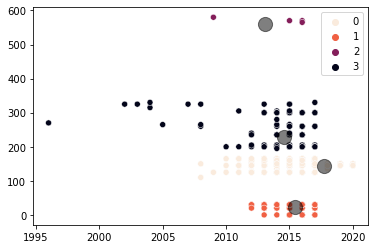

In [109]:
sns.scatterplot(x= x_test[:,0],y= x_test[:,1], hue=y_kmeans, palette="rocket_r");
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);

### Sistema de recomendación.
Muy bien! ya tenemos los datos, centroides, y estamos listos para crear un sistema que nos recomiende películas. Para ello usaremos la librería MLUtilites que hemos estado construyendo en esta sesión.

In [59]:
import MLUtilities as utils

Esta función va a recibir la lista de todas las peliculas (solo el texto), los datos de todas las películas (igual que como sacamos X), la pelicula ejemplo (Los valores de cantidad de acción y cantidad de romance), y los centroides de Kmeans.

In [92]:
def recomiendameAutos(datosModelo,modeloEjemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = utils.centroideCercano(modeloEjemplo, centroides)
    
    #Luego, vamos a clasificar todos los modelos por centroides.
    clasificaciones = utils.clasificarPorCentroides(datosModelo, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de modelos y años.
    return indices

#### Recomiendame un nuevo auto
Seleccionamos un índice del dataframe para obtener las características de autos similares.

In [93]:
#Sientete libre de cambiar este valor.
indice_df = 5

#Extrae la película que deseas del dataframe.
modeloElegido = df_bmw_filter.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristicaModelo = modeloElegido[['year','tax']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendameAutos(X, caracteristicaModelo, centroides)

#E imprime lo que hallaste!
print("Porque tienes el modelo "+ modeloElegido['model']+" del año "+ str(modeloElegido['year'])+ " ...")
print(df_bmw_filter.iloc[recomendaciones][['model','year']][:10])

Porque tienes el modelo  5 Series del año 2016 ...
        model  year
0    5 Series  2014
1    6 Series  2018
2    5 Series  2016
3    1 Series  2017
4    7 Series  2014
5    5 Series  2016
6    5 Series  2017
7    2 Series  2018
10         X3  2017
12         X3  2016
